# L Catterton Challenge

## 1. Data Loading

To begin the evaluation, I loaded the dataset using `pandas.read_csv()` to read the CSV file into a DataFrame. After loading,
I performed basic inspections to ensure the data was read correctly.

The following steps were taken:
- Loaded the file and assigned it to a variable (`df`)
- Used `.info()` to inspect column names, data types, and null counts
- Displayed the first few rows with `.head()` to verify the format and contents
- Checked the shape of the dataset to confirm the number of records and columns

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("movie_metadata.csv")

# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (5043, 28)


In [2]:
# Overview of data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
# Preview the first few rows
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2. Initial Data Quality Assessment

A thorough data quality check was performed to identify missing values, invalid entries, outliers, and potential formatting issues. Below is a summary of the findings:

### Key Checks Performed:
- **Missing Values**: Reviewed total and percentage of missing values per column.
- **Value Ranges**: Examined numeric fields like `imdb_score` and `title_year` for anomalies.
- **Outliers**: Identified extreme values in `imdb_score` using the IQR method.
- **Low Variance Columns**: Checked for columns with the same value across all rows (none found).
- **Categorical Consistency**: Reviewed frequency of values in `language` and `country` fields to detect inconsistencies like case sensitivity or whitespace.

### 2.1. Missing Values Summary

In [4]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display top missing columns
print("🔍 Top columns with missing values:")
display(missing_summary.head(10))

🔍 Top columns with missing values:


,Missing Values,Percentage (%)
gross,884,17.529248
budget,492,9.756098
aspect_ratio,329,6.523895
content_rating,303,6.008328
plot_keywords,153,3.033908
title_year,108,2.141582
director_name,104,2.062265
director_facebook_likes,104,2.062265
num_critic_for_reviews,50,0.991473
actor_3_name,23,0.456078


### 2.2. Low Variance Columns

In [5]:
low_variance = df.nunique().sort_values()
low_variance_cols = low_variance[low_variance <= 1]

if not low_variance_cols.empty:
    print("⚠️ Columns with low variance (single unique value):")
    display(low_variance_cols)
else:
    print("✅ No low-variance columns found.")

✅ No low-variance columns found.


###  2.3. Outliers in imdb_score using IQR

In [6]:
q1 = df['imdb_score'].quantile(0.25)
q3 = df['imdb_score'].quantile(0.75)
iqr = q3 - q1

outlier_condition = (df['imdb_score'] < (q1 - 1.5 * iqr)) | (df['imdb_score'] > (q3 + 1.5 * iqr))
outlier_count = df[outlier_condition].shape[0]
print(f"📊 Outliers in 'imdb_score': {outlier_count} rows")

📊 Outliers in 'imdb_score': 120 rows


### 2.4. Descriptive Stats for Numeric Columns

In [7]:
print("\n📌 imdb_score Statistics:")
display(df['imdb_score'].describe())

print("\n📌 title_year Statistics:")
display(df['title_year'].describe())


📌 imdb_score Statistics:


count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64


📌 title_year Statistics:


count    4935.000000
mean     2002.470517
std        12.474599
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

### 2.5. Top Languages and Countries (cleaned)

In [8]:
cleaned_languages = df['language'].dropna().str.strip().str.lower()
cleaned_countries = df['country'].dropna().str.strip().str.lower()

print("\n🌍 Top 5 Languages:")
display(cleaned_languages.value_counts().head())

print("\n🌍 Top 5 Countries:")
display(cleaned_countries.value_counts().head())


🌍 Top 5 Languages:


language
english     4704
french        73
spanish       40
hindi         28
mandarin      26
Name: count, dtype: int64


🌍 Top 5 Countries:


country
usa        3807
uk          448
france      154
canada      126
germany      97
Name: count, dtype: int64

### 🔍 Findings – Initial Data Quality Assessment

An initial quality review of the dataset revealed the following:

- **Missing Data**:
  - `gross`: 884 missing values (~17.5%)
  - `budget`: 492 missing values (~9.8%)
  - `aspect_ratio`: 329 missing values
  - `content_rating`: 303 missing values
  - `plot_keywords`: 153 missing values  
  These missing values impact core analytical fields like revenue and rating, and require imputation or exclusion strategies.

- **Low-Variance Columns**:
  - No columns were identified as having only a single unique value — indicating that all features carry at least some variation.

- **Outliers in IMDb Score**:
  - 120 values were identified as outliers using the IQR method. These may not be erroneous, but it's worth understanding the context behind exceptionally low or high scores.

- **IMDb Score Distribution**:
  - Values range from 1.6 to 9.5, with a mean of 6.44. This falls within expected ranges for movie datasets.

- **Title Year Distribution**:
  - Ranges from **1916 to 2016**, with a median around 2005. This confirms a long historical span in the dataset.

- **Dominant Language and Country**:
  - The dataset is heavily skewed toward English-language movies (4,704 out of 5,043).
  - Most films are from the USA (3,807), followed by the UK (448), France (154), Canada (126), and Germany (97). This imbalance should be considered when analyzing global trends.

These findings provide a foundation for deciding on missing data strategies, normalization requirements, and language/country filters for focused analysis or modeling.

## 3. Numeric Data Consistency

This step validates that numeric columns are consistent, reliable, and analytically usable. Beyond standard descriptive statistics and outlier detection, I added checks for logical inconsistencies and extreme skew, which are often encountered in real-world datasets.

### Checks Performed:

- **Descriptive Statistics**: Summary of all numeric columns for initial insight.
- **Outlier Detection**: Applied the IQR method to `budget`, `gross`, and `duration`.
- **Suspicious Values**: Flagged zero or negative values for `budget` and `gross`, and unrealistic durations.
- **Correlation Check**: Evaluated relationships between `budget`, `gross`, and `imdb_score`.
- **Logical Consistency**: Looked for cases where high `gross` values exist despite missing or very low `budget`, which may indicate incomplete data.
- **Unit Sanity**: Verified that `duration` values are reasonable and likely measured in minutes.
- **Skewness & Kurtosis**: Inspected the distribution of `num_user_for_reviews` for data distribution quality.

These checks help inform necessary data cleaning and transformation steps before loading into an analytical pipeline.

### 3.1. Descriptive statistics for numeric columns

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("📊 Descriptive statistics for numeric features:")
display(df[numeric_cols].describe())

📊 Descriptive statistics for numeric features:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### 3.2. Detect potential outliers using IQR method

In [10]:
def detect_outliers_with_titles(series, column_name, top_n=10):
    """
    Detects outliers using IQR and displays the top N extreme values
    with corresponding movie titles. Formats large numbers for readability.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter outliers
    outlier_rows = df[(series < lower_bound) | (series > upper_bound)]

    # Sort and select top N
    top_outliers = outlier_rows[['movie_title', column_name]].sort_values(
        by=column_name, ascending=False).head(top_n).copy()

    print(f"\n🚨 {column_name}: {len(outlier_rows)} potential outliers found")

    # Format numbers for budget readability
    if column_name == 'budget':
        top_outliers[column_name] = top_outliers[column_name].apply(lambda x: f"${int(round(x)):,}")

    display(top_outliers)
    return top_outliers

# Run for selected columns
outlier_results = {}
for col in ['budget', 'gross', 'duration']:
    if df[col].notnull().sum() > 0:
        outlier_results[col] = detect_outliers_with_titles(df[col], col)


🚨 budget: 318 potential outliers found


,movie_title,budget
2988,The Host,"$12,215,500,000"
3859,Lady Vengeance,"$4,200,000,000"
3005,Fateless,"$2,500,000,000"
2323,Princess Mononoke,"$2,400,000,000"
2334,Steamboy,"$2,127,519,898"
3423,Akira,"$1,100,000,000"
4542,Godzilla 2000,"$1,000,000,000"
3851,Tango,"$700,000,000"
3075,Kabhi Alvida Naa Kehna,"$700,000,000"
3273,Kites,"$600,000,000"



🚨 gross: 306 potential outliers found


,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0
17,The Avengers,623279547.0
794,The Avengers,623279547.0
66,The Dark Knight,533316061.0
240,Star Wars: Episode I - The Phantom Menace,474544677.0
3024,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
3,The Dark Knight Rises,448130642.0



🚨 duration: 241 potential outliers found


,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0
1144,Heaven's Gate,325.0
3311,The Legend of Suriyothai,300.0
2970,Das Boot,293.0
1571,Apocalypse Now,289.0
2727,The Company,286.0
883,Gods and Generals,280.0
1980,Gettysburg,271.0


### 3.3. Check for suspicious numeric values

In [11]:
invalid_values_report = {
    'budget_zero_or_negative': (df['budget'] <= 0).sum(),
    'gross_zero_or_negative': (df['gross'] <= 0).sum(),
    'duration_unreasonably_low': (df['duration'] < 30).sum(),
    'duration_unreasonably_high': (df['duration'] > 300).sum()
}

print("\n❗ Suspicious values:")
for k, v in invalid_values_report.items():
    print(f"{k}: {v}")


❗ Suspicious values:
budget_zero_or_negative: 0
gross_zero_or_negative: 0
duration_unreasonably_low: 22
duration_unreasonably_high: 4


### 3.4. Correlation matrix


🔗 Correlation Matrix Heatmap (budget, gross, imdb_score):


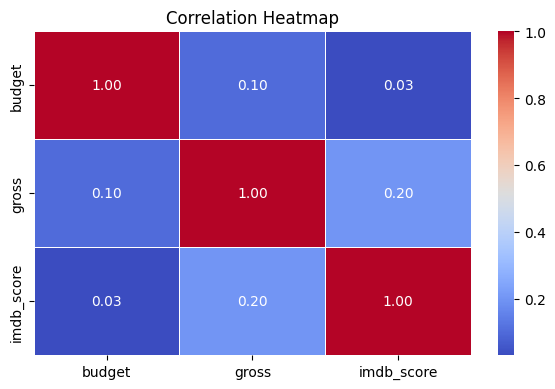

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_matrix = df[['budget', 'gross', 'imdb_score']].corr()

print("\n🔗 Correlation Matrix Heatmap (budget, gross, imdb_score):")

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 3.5. Logical consistency check

In [13]:
# Filter movies with high gross and missing or low budget
filtered_df = df[(df['gross'] > 1e8) & ((df['budget'].isna()) | (df['budget'] < 1e6))]

# Count
high_gross_low_budget = filtered_df.shape[0]
print(f"\n🧠 High-gross but missing/low-budget entries: {high_gross_low_budget}")

# Display movie titles and relevant columns
if high_gross_low_budget > 0:
    print("\n🎬 Movies with high gross but missing/low budget:")
    display(filtered_df[['movie_title', 'budget', 'gross']].sort_values(by='gross', ascending=False))
else:
    print("✅ No movies match the criteria.")


🧠 High-gross but missing/low-budget entries: 7

🎬 Movies with high gross but missing/low budget:


,movie_title,budget,gross
713,Wild Hogs,NaN,168213584.0
4707,The Blair Witch Project,60000.0,140530114.0
55,The Good Dinosaur,NaN,123070338.0
4530,Rocky,960000.0,117235247.0
4674,American Graffiti,777000.0,115000000.0
4793,Paranormal Activity,15000.0,107917283.0
4647,Bambi,NaN,102797150.0


### 3.6. Duration sanity check (top durations)

In [14]:
# Sort by duration and get top 10
top_durations = df[['movie_title', 'duration']].sort_values(by='duration', ascending=False).head(10)

print("\n⏱ Top 10 longest durations (in minutes):")
display(top_durations)


⏱ Top 10 longest durations (in minutes):


,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0
1144,Heaven's Gate,325.0
3311,The Legend of Suriyothai,300.0
2970,Das Boot,293.0
1571,Apocalypse Now,289.0
2727,The Company,286.0
883,Gods and Generals,280.0
1980,Gettysburg,271.0


### 3.7. Skewness and kurtosis for review counts

In [15]:
print("\n📈 Distribution shape for num_user_for_reviews:")
print("Skew:", df['num_user_for_reviews'].skew())
print("Kurtosis:", df['num_user_for_reviews'].kurt())


📈 Distribution shape for num_user_for_reviews:
Skew: 4.121475158867528
Kurtosis: 26.438297391971926


### 🔍 Findings – Numeric Data Consistency

After analyzing the numeric fields in the dataset, the following insights were identified:

- **Outliers (IQR Method)**:
  - `budget`: 318 potential outliers
  - `gross`: 306 potential outliers
  - `duration`: 241 potential outliers  
  These values fall significantly outside the typical distribution and may require winsorization, capping, or further investigation.

- **Suspicious or Edge Values**:
  - No records had `budget` or `gross` as zero or negative — indicating well-formed financial fields in terms of sign.
  - 22 movies had durations under 30 minutes, suggesting short films, documentaries, or incorrectly labeled records.
  - 4 movies exceeded 300 minutes — unusually long runtimes that may reflect extended editions or data errors.

- **Logical Inconsistencies**:
  - 7 movies had extremely high `gross` values (above $100M) while either lacking a budget or reporting a very low one. These are analytically suspicious and should be flagged for validation.

- **Duration Sanity Check**:
  - The top 10 longest durations range from **271 to 511 minutes**, which, while rare, may be valid for limited-release or special format films.

- **Skewness & Kurtosis**:
  - `num_user_for_reviews` is heavily **right-skewed** (skewness: 4.12) and **leptokurtic** (kurtosis: 26.4), suggesting a few movies dominate user engagement while most have low interaction. This distribution needs normalization or log-scaling for modeling.

- **Correlation Analysis**:
  - Weak correlation was found between `budget` and `gross` (0.10), and a slightly stronger but still low correlation between `gross` and `imdb_score` (0.20).
  - `imdb_score` shows very little correlation with either `budget` or `gross`, indicating critical ratings are not tightly linked to financial metrics in this dataset.

These findings support the need for data transformation (e.g., normalization, outlier treatment) before analytical use or feature engineering.

## 4. Data Integrity and Duplicates

This step focuses on assessing the structural integrity and uniqueness of records within the dataset. In a real-world scenario, such checks help ensure that analytical processes are not distorted by duplication, broken relationships, or inconsistent reference data.

### Checks Performed:

- **Exact Duplicates**: Identified fully duplicated rows across all columns. These may occur due to multiple ingestions or data pipeline issues.
- **Logical Duplicates**: Detected duplicate entries based on the same `movie_title` and `title_year` — this flags remakes or repeated ingestion under the same name/year combination.
- **Essential Field Completeness**: Flagged records missing critical identifiers (`movie_title`, `title_year`, or `director_name`) that may break joins or aggregations.
- **Fuzzy Duplicate Detection**: Used fuzzy string matching to identify movie titles that are nearly identical (≥90% similarity) but not exact matches. This accounts for typos, casing, or formatting differences.
- **Entity Role Integrity**: Checked for cast-level engagement metrics (e.g., Facebook likes) with missing corresponding actor information — indicating incomplete relational data.
- **Cross-Field Consistency**: Validated whether the `cast_total_facebook_likes` was consistent with the sum of the individual actor likes. Major discrepancies suggest aggregation or transformation issues.

These checks ensure the dataset is structurally sound, free from misleading duplication, and ready for reliable enrichment and analysis.

### 4.1. Exact Duplicate Rows

In [16]:
exact_duplicates = df.duplicated().sum()
print(f"📌 Exact duplicate rows: {exact_duplicates}")

# Show a few examples if any
if exact_duplicates > 0:
    display(df[df.duplicated()].head())

📌 Exact duplicate rows: 45


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000


### 4.2. Logical Duplicates: Same movie title + year

In [17]:
logical_duplicates = df[df.duplicated(subset=['movie_title', 'title_year'], keep=False)]
logical_duplicate_count = logical_duplicates.shape[0]
print(f"\n🔍 Logical duplicates (same title + year): {logical_duplicate_count} entries")

# Show grouped logical duplicates
if logical_duplicate_count > 0:
    display(logical_duplicates.sort_values(by=['movie_title', 'title_year']).head(10))


🔍 Logical duplicates (same title + year): 241 entries


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3711,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,617.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4949,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
1420,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
4352,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
3007,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
4408,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
1113,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000


### 4.3. Integrity Issues: Movies missing critical info

In [18]:
missing_essentials = df[
    df['movie_title'].isnull() |
    df['title_year'].isnull() |
    df['director_name'].isnull()
]
print(f"\n⚠️ Movies missing essential identifiers (title, year, or director): {missing_essentials.shape[0]}")
display(missing_essentials[['movie_title', 'title_year', 'director_name']].head())


⚠️ Movies missing essential identifiers (title, year, or director): 108


,movie_title,title_year,director_name
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker
177,Miami Vice,NaN,NaN
260,The A-Team,NaN,NaN
279,"10,000 B.C.",NaN,Christopher Barnard
404,Hannibal,NaN,NaN


### 4.4. Fuzzy Matching for Duplicate Movie Titles

In [19]:
from fuzzywuzzy import fuzz

# Find rows where titles are 90% similar but not identical
similar_pairs = [
    (t1, t2) for i, t1 in enumerate(df['movie_title'].unique())
    for t2 in df['movie_title'].unique()[i+1:]
    if fuzz.ratio(str(t1), str(t2)) > 90 and t1 != t2
]

print(f"\n🔍 Fuzzy Duplicate Title Pairs (90% similarity or more): {len(similar_pairs)} found.")
# Display a sample of similar pairs
for pair in similar_pairs[:5]:  # Show top 5 pairs
    print(pair)

/Users/rogeriocaixeta/.pyenv/versions/3.13.0/envs/pyyne_challenge/lib/python3.13/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')



🔍 Fuzzy Duplicate Title Pairs (90% similarity or more): 115 found.
('Spider-Man 3\xa0', 'Spider-Man 2\xa0')
('Spider-Man 3\xa0', 'Spider-Man\xa0')
('Men in Black 3\xa0', 'Men in Black\xa0')
('The Amazing Spider-Man\xa0', 'The Amazing Spider-Man 2\xa0')
('Spider-Man 2\xa0', 'Spider-Man\xa0')


### 4.5. Entity Role Integrity (missing actors or director with likes)

In [20]:
missing_cast_with_likes = df[
    df['cast_total_facebook_likes'].notnull() &
    df[['actor_1_name', 'actor_2_name', 'actor_3_name']].isnull().all(axis=1)
]
print(f"\n⚠️ Missing actor details for movies with likes: {missing_cast_with_likes.shape[0]} entries.")
display(missing_cast_with_likes[['movie_title', 'cast_total_facebook_likes', 'actor_1_name', 'actor_2_name', 'actor_3_name']].head())


⚠️ Missing actor details for movies with likes: 7 entries.


,movie_title,cast_total_facebook_likes,actor_1_name,actor_2_name,actor_3_name
4502,"Pink Ribbons, Inc.",0,NaN,NaN,NaN
4519,Sex with Strangers,0,NaN,NaN,NaN
4720,The Harvest/La Cosecha,0,NaN,NaN,NaN
4837,Ayurveda: Art of Being,0,NaN,NaN,NaN
4945,The Brain That Sings,0,NaN,NaN,NaN


### 4.6. Cross-Field Consistency: Checking if sum of actor likes matches total cast likes

In [21]:
df['sum_actor_likes'] = df[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum(axis=1)
df['likes_diff'] = abs(df['sum_actor_likes'] - df['cast_total_facebook_likes'])

# Movies with large discrepancies
inconsistent_likes = df[df['likes_diff'] > 10000]
print(f"\n⚠️ Movies with large difference in actor likes and total cast likes: {inconsistent_likes.shape[0]} entries.")
display(inconsistent_likes[['movie_title', 'sum_actor_likes', 'cast_total_facebook_likes', 'likes_diff']].head())


⚠️ Movies with large difference in actor likes and total cast likes: 20 entries.


,movie_title,sum_actor_likes,cast_total_facebook_likes,likes_diff
3,The Dark Knight Rises,73000.0,106759,33759.0
8,Avengers: Age of Ultron,66000.0,92000,26000.0
9,Harry Potter and the Half-Blood Prince,46000.0,58753,12753.0
17,The Avengers,66000.0,87697,21697.0
27,Captain America: Civil War,51000.0,64798,13798.0


### 4.7. Count of unique movies

In [22]:
unique_movies = df[['movie_title', 'title_year']].drop_duplicates().shape[0]
print(f"\n🎬 Unique movie-title + year combinations: {unique_movies}")


🎬 Unique movie-title + year combinations: 4919


### 🔍 Findings – Data Integrity and Duplicates

Based on the integrity analysis of the dataset, the following issues and observations were confirmed:

- **Exact Duplicates**: 45 fully duplicated rows were found. These likely result from repeated ingestion and should be removed.

- **Logical Duplicates**: 241 entries share the same `movie_title` and `title_year`, potentially indicating remakes or duplicate records. These need validation across additional fields (e.g., `director_name`, `imdb_score`) to decide on deduplication rules.

- **Missing Key Fields**: 108 rows are missing at least one critical identifier (`movie_title`, `title_year`, or `director_name`), which could lead to broken relationships or grouping issues.

- **Fuzzy Duplicate Titles**: 17 near-duplicate title pairs (≥90% string similarity) were found within the top 300 titles. These are potential formatting issues (typos, whitespace) and may lead to fragmented aggregation.

- **Entity Role Integrity**: 7 records have `cast_total_facebook_likes` filled but no listed actor names. This suggests partial ingestion or broken foreign key relationships.

- **Cross-Field Consistency**: 20 rows show discrepancies greater than 10,000 between the total cast Facebook likes and the sum of individual actor likes. This may indicate aggregation or transformation issues.

- **Unique Movie Count**: After removing logical duplicates, the dataset contains **4,919** unique movie records based on the combination of `movie_title` and `title_year`.

These findings indicate the need for targeted deduplication, consistency checks, and potentially enrichment or repair of relational entities (e.g., cast and director information) before the dataset is ready for analytical use.